In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance
from itertools import combinations
np.random.seed(52)

In [106]:
a = np.random.randint(1, 5, size=(5,3))
b = np.random.randint(6, 10, size=(5,3))
dataset = np.vstack((a, b))


In [107]:
# calculating euclidean distances
similarity_distance = distance.pdist(dataset, 'euclidean')
med = np.median(similarity_distance)
gauss_kernel_simi = np.exp(-np.square(similarity_distance)/(2*np.square(med)))

In [108]:
#creating adjacency matrices
adj_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
indices = list(combinations(range(dataset.shape[0]), 2))
assert len(list(indices)) == len(gauss_kernel_simi)

for i in range(len(gauss_kernel_simi)):
    adj_matrix[indices[i][0], indices[i][1]] = gauss_kernel_simi[i]
    adj_matrix[indices[i][1], indices[i][0]] = gauss_kernel_simi[i]
    indices[i] = indices[i] + (float(gauss_kernel_simi[i]), )

adj_matrix


array([[0.        , 0.90483742, 0.96078944, 0.91393119, 0.97044553,
        0.41478291, 0.37908304, 0.4965853 , 0.60653066, 0.33287108],
       [0.90483742, 0.        , 0.83527021, 0.89583414, 0.91393119,
        0.26184567, 0.22537266, 0.29523017, 0.41478291, 0.19398004],
       [0.96078944, 0.83527021, 0.        , 0.95122942, 0.97044553,
        0.50661699, 0.46301307, 0.60653066, 0.71177032, 0.42316208],
       [0.91393119, 0.89583414, 0.95122942, 0.        , 0.94176453,
        0.36421898, 0.31981902, 0.44485807, 0.55432728, 0.29229258],
       [0.97044553, 0.91393119, 0.97044553, 0.94176453, 0.        ,
        0.47236655, 0.42316208, 0.52204578, 0.66365025, 0.37908304],
       [0.41478291, 0.26184567, 0.50661699, 0.36421898, 0.47236655,
        0.        , 0.99004983, 0.90483742, 0.94176453, 0.98019867],
       [0.37908304, 0.22537266, 0.46301307, 0.31981902, 0.42316208,
        0.99004983, 0.        , 0.91393119, 0.91393119, 0.99004983],
       [0.4965853 , 0.29523017, 0.6065306

In [109]:
#Create a degree matrix
degree_matrix = np.diag(np.sum(adj_matrix, axis=1))
degree_matrix

array([[5.97985657, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 4.9410844 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 6.42882773, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 5.67827521, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 6.25689449,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        5.83668156, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 5.6184119 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [110]:
#create a laplacian matrix L = Degree - Adjacency
lap_mat = degree_matrix - adj_matrix
eig_val, eig_vec = np.linalg.eigh(lap_mat)
eig_val, eig_vec = np.argsort(eig_val), eig_vec[np.argsort(eig_val)]
fiedler_vector = eig_vec[:, 1]

{0: Text(0.26647214617395687, -0.17726694368043297, '0'),
 1: Text(-0.08380682655340524, -0.6507119288168891, '1'),
 2: Text(0.05530385212005739, 0.2179186147248797, '2'),
 3: Text(0.3381864914680655, -0.6770474601650102, '3'),
 4: Text(-0.42475019151197324, -0.2765629127359998, '4'),
 5: Text(0.010164123724329344, -0.15837852115170334, '5'),
 6: Text(0.35764812907606525, 0.5036353523604433, '6'),
 7: Text(-0.3100260767782295, 0.24871121426548826, '7'),
 8: Text(0.7554705950465094, -0.030297414800784316, '8'),
 9: Text(-0.9646622427653749, 1.0, '9')}

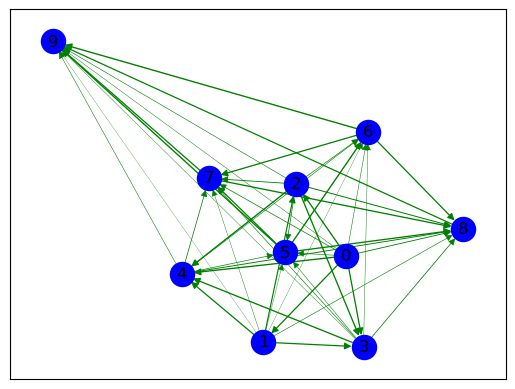

In [111]:
g = nx.DiGraph()
g.add_weighted_edges_from(indices)
weights = [g[u][v]['weight'] for u,v in g.edges()]
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_color="blue")
nx.draw_networkx_edges(g, pos, width=weights, edge_color="green")
nx.draw_networkx_labels(g, pos, font_color="black")

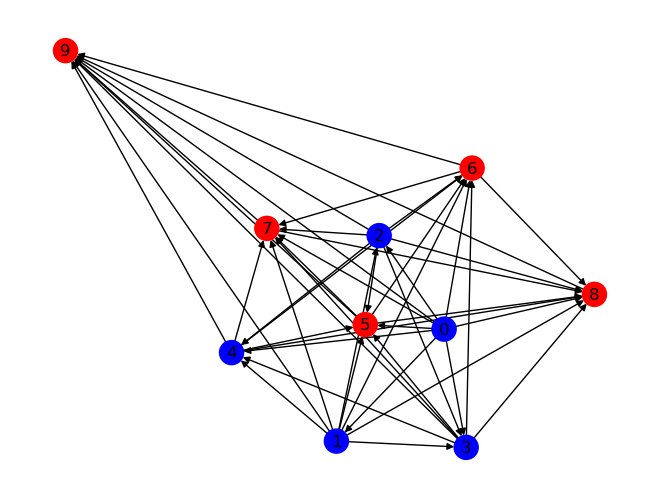

In [112]:
fiedler_vector_med = np.median(fiedler_vector)
clusters = np.where(fiedler_vector > fiedler_vector_med, 1, 0)
colors = ["red" if cluster == 0 else "blue" for cluster in clusters]
nx.draw(g, pos, node_color=colors, with_labels=True)